In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
path = "/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/thesis2/data/final_tables/banc/banc.csv"
df = pd.read_csv(path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [3]:
df.head()

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,temperature,humidity,cloudcover,windspeed,day_of_week,hour,month
0,2015-07-01 01:00:00,2513.0,2226.0,1559.0,banc,0.972796,38.5,18,10,8.7,2,1,7
1,2015-07-01 02:00:00,2275.0,2035.0,1441.0,banc,0.524716,37.7,19,12,10.4,2,2,7
2,2015-07-01 03:00:00,2104.0,1897.0,1399.0,banc,0.202776,35.4,23,11,10.7,2,3,7
3,2015-07-01 04:00:00,1988.0,1821.0,1354.0,banc,-0.015616,32.5,27,16,11.4,2,4,7
4,2015-07-01 05:00:00,1958.0,1811.0,1334.0,banc,-0.072097,30.3,31,21,9.0,2,5,7


In [26]:
df['day_of_week'] = df['timestamp'].dt.dayofweek

In [27]:
df.head()

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,temperature,humidity,cloudcover,windspeed,day_of_week,hour,month
0,2015-07-01 01:00:00,2513.0,2226.0,1559.0,banc,0.972796,38.5,18,10,8.7,2,1,7
1,2015-07-01 02:00:00,2275.0,2035.0,1441.0,banc,0.524716,37.7,19,12,10.4,2,2,7
2,2015-07-01 03:00:00,2104.0,1897.0,1399.0,banc,0.202776,35.4,23,11,10.7,2,3,7
3,2015-07-01 04:00:00,1988.0,1821.0,1354.0,banc,-0.015616,32.5,27,16,11.4,2,4,7
4,2015-07-01 05:00:00,1958.0,1811.0,1334.0,banc,-0.072097,30.3,31,21,9.0,2,5,7


# Load values

In [28]:
# Calculate mean and standard deviation
mean_val = df['Demand (MWh)'].mean()
std_dev = df['Demand (MWh)'].std()

# Set histogram range to +/- one standard deviation from the mean
hist_range = (0, mean_val + std_dev/10)

In [29]:
mean_val + 3*std_dev

3589.759240785105

In [30]:
std_dev

531.154890225624

In [31]:
num_bins=15

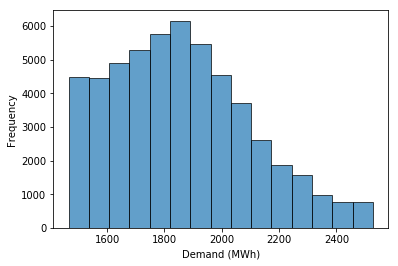

In [32]:
demand = df['Demand (MWh)']

# Calculate mean and standard deviation
mean_val = demand.mean()
std_dev = demand.std()

# Set histogram range to +/- one standard deviation from the mean
hist_range = (mean_val-std_dev, mean_val + std_dev)

# Plot histogram
plt.hist(demand, bins=num_bins, range=hist_range, edgecolor='black', alpha=0.7)
plt.xlabel('Demand (MWh)')
plt.ylabel('Frequency')
# plt.title('Histogram of Log10(Demand (MWh))')
plt.show()

In [20]:
df[df['Demand (MWh)']<1000]

,timestamp,Demand (MWh),Demand Forecast (MWh),Net Generation (MWh),Region,Normalized Demand,temperature,humidity,cloudcover,windspeed,day_of_week,hour,month


In [21]:
min(df['Demand (MWh)'])

1110.0

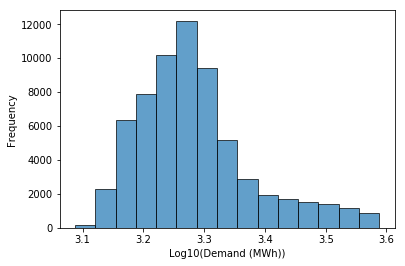

In [22]:
# Transform the values using the natural logarithm
log_demand = np.log10(df['Demand (MWh)'])

# Calculate mean and standard deviation
log_mean_val = log_demand.mean()
log_std_dev = log_demand.std()

# Set histogram range to +/- one standard deviation from the mean
log_hist_range = (log_mean_val-2*log_std_dev, log_mean_val + 3*log_std_dev)

# Plot histogram
plt.hist(log_demand, bins=num_bins, range=log_hist_range, edgecolor='black', alpha=0.7)
plt.xlabel('Log10(Demand (MWh))')
plt.ylabel('Frequency')
# plt.title('Histogram of Log10(Demand (MWh))')
plt.show()

# Average loads by hour

In [33]:
hourly_means.keys()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')

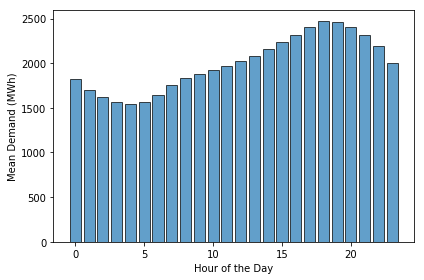

In [34]:
# Extract hour from the timestamp
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Compute mean demand for each hour
hourly_means = df.groupby('hour')['Demand (MWh)'].mean()

# Plot the results
plt.figure()
plt.bar(hourly_means.keys(), hourly_means.values, edgecolor='black', alpha=0.7)
# hourly_means.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Demand (MWh)')
# plt.title('Mean Demand for Each Hour of the Day')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

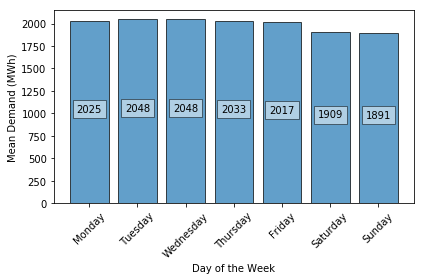

In [35]:
# Map numerical days to their string names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_mapping)

# Compute mean demand for each day of the week
daily_means = df.groupby('day_name')['Demand (MWh)'].mean().reindex(day_mapping.values())

# Plot the results
plt.figure()
plt.bar(daily_means.keys(), daily_means.values, edgecolor='black', alpha=0.7)
for index, value in enumerate(daily_means.values):
#     print(value)
    plt.text(index, value//2, str(int(value)), ha = 'center',Bbox = dict(facecolor = 'white', alpha = .5))
plt.xlabel('Day of the Week')
plt.ylabel('Mean Demand (MWh)')
# plt.ylim(min(daily_means.values)-10, max(daily_means.values)+10)
# plt.title('Mean Demand by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

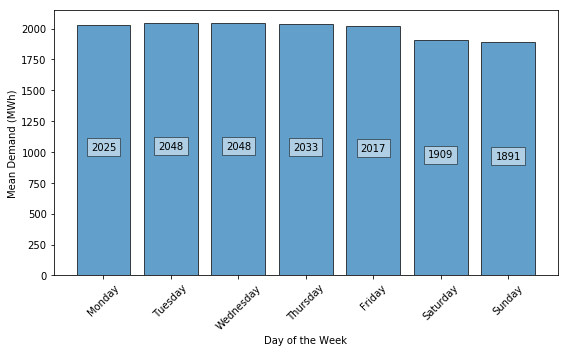

In [67]:
# Map numerical days to their string names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_mapping)

# Compute mean demand for each day of the week
daily_means = df.groupby('day_name')['Demand (MWh)'].mean().reindex(day_mapping.values())

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(daily_means.keys(), daily_means.values, edgecolor='black', alpha=0.7)
for index, value in enumerate(daily_means.values):
#     print(value)
    plt.text(index, value//2, str(int(value)), ha = 'center',Bbox = dict(facecolor = 'white', alpha = .5))
plt.xlabel('Day of the Week')
plt.ylabel('Mean Demand (MWh)')
# plt.ylim(min(daily_means.values)-10, max(daily_means.values)+10)
# plt.title('Mean Demand by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/SemesterReport/dayofweekbar.pdf", format="pdf", bbox_inches="tight")

plt.show()

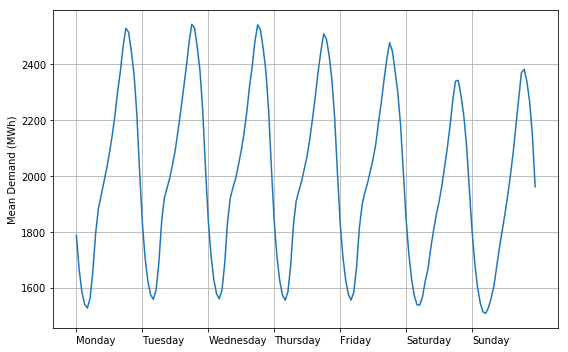

In [66]:
average_demand = df.groupby(['day_of_week', 'hour'])['Demand (MWh)'].mean().unstack()
# Flattening the DataFrame to a series
average_demand_series = average_demand.stack().reset_index(name='Average Demand')

# Sorting values (optional, if needed, based on the structure of the data)
average_demand_series.sort_values(by=['day_of_week', 'hour'], inplace=True)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(average_demand_series['Average Demand'])
# plt.title('Hourly Demand in BANC Over the Week')
plt.ylabel('Mean Demand (MWh)')
plt.grid(True)

# Customizing the x-ticks to show day and hour
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
xtick_labels = [f'{day_mapping[day]}' for day, hour in zip(average_demand_series['day_of_week'], average_demand_series['hour'])]
plt.xticks(ticks=range(0, len(xtick_labels), int(len(xtick_labels)/7)), labels=xtick_labels[::int(len(xtick_labels)/7)], rotation=0, ha="left")

plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/SemesterReport/dayofweekcurve.pdf", format="pdf", bbox_inches="tight")

plt.show()



In [39]:
average_demand

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,1787.370844,1665.664962,1585.537084,1540.099744,1527.156010,1562.526854,1659.583120,1792.959079,1882.974425,1930.358056,...,2214.414322,2302.046036,2374.071611,2464.337596,2529.363171,2515.572890,2447.350384,2363.035806,2222.647059,2018.381074
1,1834.751918,1707.769821,1624.227621,1575.035806,1557.913043,1590.457801,1686.475703,1832.393862,1920.529412,1957.092072,...,2233.723785,2310.447570,2390.127877,2477.485934,2543.593350,2531.368286,2461.629156,2376.248082,2233.115090,2028.736573
2,1842.317136,1716.507653,1630.395408,1578.890306,1560.045918,1591.209184,1686.936224,1832.923469,1920.334184,1959.272959,...,2226.025510,2319.099490,2391.775510,2483.640306,2541.943878,2523.482143,2457.058673,2375.061224,2230.663265,2028.147959
3,1840.693878,1711.357143,1626.477041,1573.244898,1555.010204,1585.053571,1679.806122,1823.594388,1909.989796,1947.252551,...,2208.673469,2287.961735,2374.928571,2447.183673,2509.403061,2491.079082,2432.732143,2345.841837,2211.191327,2016.788265
4,1834.704082,1711.844388,1628.742347,1575.617347,1555.609694,1584.890306,1674.897959,1812.926020,1896.198980,1940.316327,...,2193.267857,2265.594388,2345.645408,2419.811224,2477.561224,2448.650510,2377.568878,2298.441327,2184.035714,2014.573980
5,1849.426020,1722.897959,1631.367347,1571.576531,1538.387755,1537.681122,1567.846939,1623.920918,1667.451531,1741.816327,...,2031.102041,2098.711735,2178.931122,2270.880102,2340.002551,2342.956633,2288.533163,2218.104592,2113.114796,1961.117347
6,1808.137755,1689.263427,1603.112532,1545.475703,1513.115090,1507.938619,1528.805627,1563.258312,1607.250639,1675.754476,...,2003.260870,2084.033248,2181.291560,2275.976982,2370.322251,2382.652174,2338.409207,2266.040921,2144.682864,1961.473146


In [96]:
daily_means

day_name
Monday       2264.577153
Tuesday      2985.899936
Wednesday    2620.871585
Thursday     2049.528593
Friday       3154.804528
Saturday     3169.533482
Sunday       1944.729782
Name: Demand (MWh), dtype: float64

# Correlations